<a href="https://colab.research.google.com/github/Mariammmmmmm/NLP/blob/main/Lab_3_reveiew_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA example

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [ ]:
# Gensim 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_csv('financial_review.csv')
df.head()

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
0,/kredit-evropa-bank.html,NaN,"Брал кредит в данной организации, после погаше...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1,/kredit-evropa-bank.html,NaN,"В 2011 году,мною была оформлена мега карта в Т...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2,/kredit-evropa-bank.html,NaN,С родителями увидели рекламу вклада Осеннее пр...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
3,/kredit-evropa-bank.html,NaN,Связать три года своей жизни с этим непорядочн...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
4,/kredit-evropa-bank.html,NaN,"Пользуюсь месяц карточкой Card Plus, сегодня п...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['bank_name'].value_counts()[:10]

втб                          2603
сбербанк                     2481
тинькофф банк                1476
почта банк                   1264
альфа-банк                   1260
открытие                      868
совкомбанк                    844
отп банк                      698
московский кредитный банк     673
хоум кредит банк              575
Name: bank_name, dtype: int64

In [ ]:
df = df[df["bank_name"]=='сбербанк']
df.reset_index(drop=True, inplace=True)
df

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
0,/sberbank-rossii.html,NaN,3 раза я обращался по вопросу списаний за овер...,сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1,/sberbank-rossii.html,NaN,Очень возмущена и удивлена сложившейся ситуаци...,сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2,/sberbank-rossii.html,NaN,"Я уже не знаю, дождемся ли мы, чтобы сбер пров...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
3,/sberbank-rossii.html,NaN,"Здравствуйте, у меня возникла следующая пробле...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
4,/sberbank-rossii.html,NaN,"Дорогой друг Сбербанк, как же мне не хочется и...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2476,/bank/sberbank-rossii/,"елена,",Обратились с мужем в отделение сбербанка для п...,сбербанк,https://www.sravni.ru,"20 окт, 2015",/bank/sberbank-rossii/otzyv/178947/?page,1,NaN,NaN
2477,/bank/sberbank-rossii/,"Светлана Бачкова,",Все равно каким способом получать деньги с кли...,сбербанк,https://www.sravni.ru,"05 дек, 2016",/bank/sberbank-rossii/otzyv/219105/?page,1,NaN,NaN
2478,/bank/sberbank-rossii/,"Оксана,","РефинансированиеНачну по порядку,живя в браке ...",сбербанк,https://www.sravni.ru,"02 окт, 2018",/bank/sberbank-rossii/otzyv/299483/?page,5,NaN,NaN
2479,/bank/sberbank-rossii/,"ольга,","Моему возмущению нет предела.Я думала,что дове...",сбербанк,https://www.sravni.ru,"23 авг, 2015",/bank/sberbank-rossii/otzyv/170655/?page,1,NaN,NaN


In [ ]:
df['tokenized_review'] = df['review']
#.str.split(' ')

In [ ]:
df['tokenized_review']

0       3 раза я обращался по вопросу списаний за овер...
1       Очень возмущена и удивлена сложившейся ситуаци...
2       Я уже не знаю, дождемся ли мы, чтобы сбер пров...
3       Здравствуйте, у меня возникла следующая пробле...
4       Дорогой друг Сбербанк, как же мне не хочется и...
                              ...                        
2476    Обратились с мужем в отделение сбербанка для п...
2477    Все равно каким способом получать деньги с кли...
2478    РефинансированиеНачну по порядку,живя в браке ...
2479    Моему возмущению нет предела.Я думала,что дове...
2480    Люди! Не подключайте услугу "Мобильный банк"! ...
Name: tokenized_review, Length: 2481, dtype: object

In [ ]:
# Convert to list
#df['tokenized_review']=df['tokenized_review'].apply(str)
data = df.tokenized_review.tolist()

data[0]

'3 раза я обращался по вопросу списаний за овердрафт, 3 раза мне присылали извинения и возврат средств. Но всё продолжается снова и снова, и если не жалуешься - не возвращают, разумеется. Списания мелкие - 15-50 рублей. Но, имея таких дойных лохов штук 1М+, это неплохой дополнительный заработок.\nКак с этим говном бороться? Нет ни времени, ни желания по полчаса общаться с представителями банка из-за 15 рублей (думаю, на это и расчет), но и дарить эти 15 рублей жуликам раз в месяц совершенно не хочется.\nПредставители Сбербанк, вы хоть почитайте, что такое "овердрафт", за который вы списываете мои деньги. У меня невозможен овердрафт, т.к. карта дебетовая и используется только в пределах московского региона, все транзакции в валюте РФ.3 раза я обращался по вопросу списаний за овердрафт, 3 раза мне присылали извинения и возврат средств. Но всё продолжается снова и снова, и если не жалуешься - не возвращают, разумеется. Списания мелкие - 15-50 рублей. Но, имея таких дойных лохов штук 1М+, 

In [ ]:
def remove_punkt(text):
    text = re.sub(r"[0-9_-]", "", text)
    text = re.sub(r"\s+"," ",  text)
    text = text.strip()
    return text

In [ ]:
import nltk
from nltk.corpus import wordnet 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# convert to lower case, removing stop words, numbers / non-alphabetic characters, lemmatization.

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()
def clear(text):
  text = text.lower()
  text = list(filter(str.isalpha, word_tokenize(text.lower())))
  text = list(lemmatizer.lemmatize(word) for word in text)
  text = list(word for word in text if word not in stop_words)
  new_text = ' '.join(text)
  return new_text

#text = clear(text)
#text[:500]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = [remove_punkt(d) for d in data]
data = [clear(d) for d in data]

In [ ]:
data[0]

'раза обращался вопросу списаний овердрафт раза присылали извинения возврат средств всё продолжается снова снова жалуешься возвращают разумеется списания мелкие рублей имея таких дойных лохов штук это неплохой дополнительный заработок этим говном бороться времени желания полчаса общаться представителями банка изза рублей думаю это расчет дарить рублей жуликам месяц совершенно хочется представители сбербанк почитайте такое овердрафт который списываете мои деньги невозможен овердрафт карта дебетовая используется пределах московского региона транзакции валюте рф раза обращался вопросу списаний овердрафт раза присылали извинения возврат средств всё продолжается снова снова жалуешься возвращают разумеется списания мелкие рублей имея таких дойных лохов штук это неплохой дополнительный заработок этим говном бороться времени желания полчаса общаться представителями банка изза рублей думаю это расчет дарить рублей жуликам месяц совершенно хочется представители сбербанк почитайте такое овердрафт

In [ ]:
data_words = [d.split(' ') for d in data]
print(data_words[3])

['здравствуйте', 'возникла', 'следующая', 'проблема', 'марта', 'обратилась', 'осб', 'перевыпуска', 'карты', 'связи', 'изменением', 'фамилии', 'карту', 'перевыпустили', 'эмбоссирована', 'старая', 'фамилия', 'оказалось', 'некомпетентный', 'сотрудник', 'заблокировал', 'карту', 'основанию', 'уничтожена', 'основанию', 'изменение', 'регистрационных', 'данных', 'доступе', 'онлайн', 'перестала', 'видеть', 'свои', 'счета', 'карты', 'повторного', 'заявления', 'перевыпустили', 'карту', 'новой', 'фамилией', 'получила', 'новый', 'логин', 'пароль', 'вошла', 'профиль', 'профиле', 'карты', 'счета', 'отражаются', 'новую', 'фамилию', 'историю', 'операций', 'отражает', 'марта', 'причем', 'операции', 'счетам', 'вкладам', 'именным', 'картам', 'также', 'отражает', 'марта', 'хотя', 'операции', 'велись', 'течении', 'года', 'данный', 'момент', 'имею', 'профиля', 'сбол', 'старую', 'фамилию', 'отражающий', 'счетов', 'карт', 'новый', 'отражающий', 'операции', 'марта', 'необходима', 'информация', 'проведенным', 'о

In [ ]:
# Build the bigram 
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [ ]:
# Define functions for bigrams

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [ ]:
data_words_bigrams[6]

['здравствуйте',
 'уважаемый',
 'сбербанк',
 'хочу_пожаловаться',
 'сервис',
 'пятницу',
 'имени',
 'нашего',
 'тсж',
 'имеющего',
 'счёт',
 'отделении',
 'енисейской',
 'улице',
 'пытался',
 'дозвониться',
 'какогонибудь',
 'менеджера',
 'отделения',
 'уточнения',
 'комплекта',
 'документов',
 'суть',
 'телефон',
 'записан',
 'бесполезно',
 'играет',
 'музыка',
 'звонок_сбрасывается',
 'ок',
 'звоню',
 'службу_качества',
 'обслуживания',
 'юридических_лиц',
 'объясняю_ситуацию',
 'говорят',
 'отделения',
 'ещё',
 'другие',
 'внутренние',
 'номера',
 'пытаюсь_дозвониться',
 'всем',
 'номерам',
 'самое',
 'играет',
 'музыка',
 'звонок_сбрасывается',
 'звоню',
 'службу_качества',
 'предлагают',
 'соединить',
 'отделением',
 'слушаю',
 'музыку',
 'течение',
 'десяти',
 'минут',
 'видимо',
 'звонок',
 'возвращается',
 'обратно',
 'службу_качества',
 'трубку',
 'снимают',
 'чтото',
 'набирают',
 'тоновом',
 'режиме',
 'звонок',
 'срывается',
 'итоге',
 'дозвониться',
 'удалось',
 'это',
 'п

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# unique id - count
print(corpus[:1])

[[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 2), (31, 2), (32, 2), (33, 6), (34, 2), (35, 2), (36, 2), (37, 2), (38, 2), (39, 2), (40, 2), (41, 4), (42, 2), (43, 2), (44, 6), (45, 2), (46, 2), (47, 4), (48, 2), (49, 2), (50, 2), (51, 2), (52, 2), (53, 2), (54, 2), (55, 2), (56, 2), (57, 2), (58, 2), (59, 4)]]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=10, step=1)

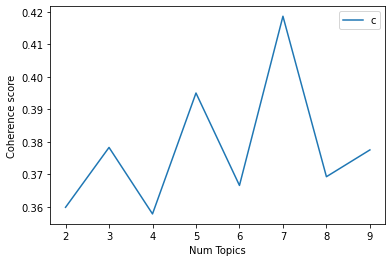

In [ ]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def compute_perplexity_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, perplexity_values

model_list, perplexity_values = compute_perplexity_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=10, step=1)

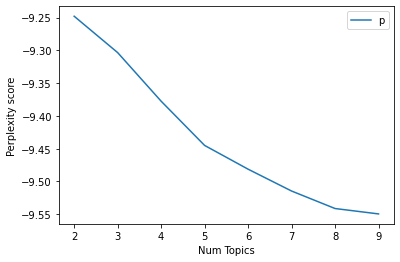

In [ ]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

Сравнивая оба графика по оценкам, выберем оптимальное количество тем, равное 5.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.003*"часа" + 0.003*"карточку" + 0.003*"другому" + 0.003*"подошла" + 0.003*"неё" + 0.002*"х" + 0.002*"очереди" + 0.002*"карточки" + 0.002*"каком_основании" + 0.002*"делают"'), (1, '0.009*"очень" + 0.006*"сбербанка" + 0.005*"отделения" + 0.005*"банка" + 0.004*"клиентов" + 0.004*"клиентам" + 0.004*"сотрудников" + 0.004*"нам" + 0.003*"спасибо" + 0.003*"работу"'), (2, '0.020*"деньги" + 0.010*"банкомат" + 0.006*"сбербанка" + 0.006*"рублей" + 0.005*"денежных_средств" + 0.005*"средств" + 0.005*"ответ" + 0.005*"сумма" + 0.005*"руб" + 0.005*"вернуть"'), (3, '0.010*"кредит" + 0.010*"документы" + 0.008*"банка" + 0.007*"кредита" + 0.007*"года" + 0.005*"сбербанка" + 0.005*"договор" + 0.004*"документов" + 0.004*"ипотеку" + 0.004*"нам"'), (4, '0.017*"это" + 0.012*"банка" + 0.012*"деньги" + 0.011*"карту" + 0.011*"сбербанка" + 0.011*"банк" + 0.010*"карты" + 0.010*"сбербанк" + 0.008*"отделение" + 0.005*"сказали"')]


In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.44501849900768

Coherence Score:  0.39498011202883687


In [ ]:
# pyLDAvis - LDA visualisation
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 9.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a18712a86ce56c5f1a2bc9a0fd067a0ccea8d407f3878da37d4786b4a36992e1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# import pyLDAvis.gensim as gensimvis
#pyLDAvis.enable_notebook()

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
pyLDAvis.__version__

'3.3.1'

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.275488  0.079292       1        1  49.886046
3     -0.003472 -0.136403       2        1  15.613273
1     -0.101109  0.189308       3        1  13.914285
2      0.019363 -0.135142       4        1  13.358865
0     -0.190270  0.002944       5        1   7.227531, topic_info=         Term         Freq        Total Category  logprob  loglift
11     деньги  2063.000000  2063.000000  Default  30.0000  30.0000
59        это  2041.000000  2041.000000  Default  29.0000  29.0000
1625   кредит   687.000000   687.000000  Default  28.0000  28.0000
102     очень   596.000000   596.000000  Default  27.0000  27.0000
84      карту  1336.000000  1336.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
3089  паспорт    26.551120    84.272729   Topic5  -6.4715   1.4723
6632    форме    22.347839    36.720219   Topic5  -6.6439   2.1307
642    говорю    23.812746    64.935432   Topic5  -6.5804   1.6241
732    москве    22.553207    65.158312   Topic5  -6.6347   1.5663
6411     этих    22.434359    76.029696   Topic5  -6.6400   1.4067

[297 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5034      4  0.974729  арест
468       1  0.834828   банк
468       2  0.085146   банк
468       4  0.079824   банк
0         1  0.712846  банка
...     ...       ...    ...
6411      1  0.657638   этих
6411      3  0.039458   этих
6411      5  0.289361   этих
59        1  0.986034    это
59        3  0.013715    это

[404 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

название тем:
1) карточка
2) кредит, страховка
3) обслуживание, сотрудники
4) операции с банкоматом
5) очереди, документы

In [ ]:
topic_list = pd.Series([max(sent[0], key=lambda x:x[1])[0] for sent in doc_lda])
df['topic'] = topic_list

In [ ]:
df

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href,tokenized_review,topic
0,/sberbank-rossii.html,NaN,3 раза я обращался по вопросу списаний за овер...,сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,3 раза я обращался по вопросу списаний за овер...,4
1,/sberbank-rossii.html,NaN,Очень возмущена и удивлена сложившейся ситуаци...,сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,Очень возмущена и удивлена сложившейся ситуаци...,4
2,/sberbank-rossii.html,NaN,"Я уже не знаю, дождемся ли мы, чтобы сбер пров...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"Я уже не знаю, дождемся ли мы, чтобы сбер пров...",0
3,/sberbank-rossii.html,NaN,"Здравствуйте, у меня возникла следующая пробле...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"Здравствуйте, у меня возникла следующая пробле...",4
4,/sberbank-rossii.html,NaN,"Дорогой друг Сбербанк, как же мне не хочется и...",сбербанк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"Дорогой друг Сбербанк, как же мне не хочется и...",4
...,...,...,...,...,...,...,...,...,...,...,...,...
2476,/bank/sberbank-rossii/,"елена,",Обратились с мужем в отделение сбербанка для п...,сбербанк,https://www.sravni.ru,"20 окт, 2015",/bank/sberbank-rossii/otzyv/178947/?page,1,NaN,NaN,Обратились с мужем в отделение сбербанка для п...,1
2477,/bank/sberbank-rossii/,"Светлана Бачкова,",Все равно каким способом получать деньги с кли...,сбербанк,https://www.sravni.ru,"05 дек, 2016",/bank/sberbank-rossii/otzyv/219105/?page,1,NaN,NaN,Все равно каким способом получать деньги с кли...,4
2478,/bank/sberbank-rossii/,"Оксана,","РефинансированиеНачну по порядку,живя в браке ...",сбербанк,https://www.sravni.ru,"02 окт, 2018",/bank/sberbank-rossii/otzyv/299483/?page,5,NaN,NaN,"РефинансированиеНачну по порядку,живя в браке ...",4
2479,/bank/sberbank-rossii/,"ольга,","Моему возмущению нет предела.Я думала,что дове...",сбербанк,https://www.sravni.ru,"23 авг, 2015",/bank/sberbank-rossii/otzyv/170655/?page,1,NaN,NaN,"Моему возмущению нет предела.Я думала,что дове...",4


In [ ]:
data = df[['score', 'topic']]
data = data[pd.to_numeric(data['score'], errors='coerce').notnull()]
data.score = data.score.astype(float)
data

,score,topic
389,1.0,4
390,1.0,3
391,5.0,1
392,1.0,2
393,1.0,4
...,...,...
2476,1.0,1
2477,1.0,4
2478,5.0,4
2479,1.0,4


In [ ]:
data.groupby('topic')['score'].mean()

topic
0    1.478261
1    4.399160
2    1.287879
3    1.628049
4    1.505673
Name: score, dtype: float64

Я думаю, что существует некоторая связь в оценкой и темой, например, в теме 1, в которой отзывы об оформлении страховок и кредитов и они имею более высокую оценку